# Compliment Agent

A single node application that compliments the user.

## Steps

0. Install dependencies
1. Define the shared graph state
2. Define a node
3. Create the graph, attaching the node
4. Compile the graph
5. (Optional) Visualise the graph
6. Run the graph

In [1]:
%pip install langgraph

from typing import TypedDict
from langgraph.graph import StateGraph 

Note: you may need to restart the kernel to use updated packages.


In [7]:
class SharedState(TypedDict):
    message : str

In [8]:
def compliment_node(state: SharedState) -> SharedState:
    state['message'] = state['message'] + ", you're doing an amazing job learning LangGraph!"
    return state

In [9]:
graph = StateGraph(SharedState)
graph.add_node("complimenter", compliment_node)
graph.set_entry_point("complimenter")
graph.set_finish_point("complimenter")
app = graph.compile()

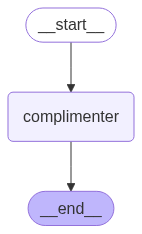

In [10]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [12]:
result = app.invoke({ 'message': 'Mel' })
result['message']

"Mel, you're doing an amazing job learning LangGraph!"